In [36]:
import pandas as pd
from datetime import *
import seaborn as sns

%matplotlib inline

In [37]:
# Read the CSV file (utf-8 encoded)
df = pd.read_csv('DataWithClimat_v1_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')





# Convert Date string to Datetime format
for index, row in df.iterrows():
    date = datetime.strptime(row['Fecha Analysis'], '%Y-%m-%d %H:%M:%S')
    df.set_value(index,'Fecha Analysis', date)

# remove the only raws from 2013
toDelete = []
for index, row in df.iterrows():
    if row['Fecha Analysis'].year == 2013:
        toDelete.append(index)
df = df.drop(toDelete)
df = df.reset_index(drop=True)

# Add year (usefull to group by)
df['year'] = ""
for index, row in df.iterrows():
    df.set_value(index,'year', row['Fecha Analysis'].year)
    
df.columns

Index([    u'Cedula',  u'Municipio',     u'Vereda',      u'Finca',
             u'SICA',   u'CEDULA 1',     u'SICA 1', u'REPRESENTA',
         u'VARIEDAD',     u'CENT_X',
       ...
             u'dtr2',       u'dtr3',       u'dtr4',       u'dtr5',
             u'dtr6',       u'dtr7',       u'dtr8',       u'dtr9',
            u'dtr10',       u'year'],
      dtype='object', length=115)

In [38]:
# A convertir en valeurs numériques

# Attention, colonne Factor de Rendimiento enlevée, mauvais parsing des données

#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)

cols = ['Malla 17-18','Malla 14-16','Malla <13','Negros y vinagres','Broca','Broca de punto','Veteado','Mordido',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo','Conchas',
         'Partido','Ambar','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total',
         'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

#df[cols] = df[cols].replace(',','.')

for c in cols:
    df[c] = df[c].replace(to_replace=',', value='.', regex=True)

In [39]:
df[cols] = df[cols].apply(pd.to_numeric)

In [40]:

precs = ['prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10']
tmins = ['tmin1','tmin2','tmin3','tmin4','tmin5','tmin6','tmin7','tmin8','tmin9','tmin10']
tmaxs = ['tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10']
tmeans = ['tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmeain10']
dtrs = ['dtr1','dtr2','dtr3','dtr4','dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Moyenne sur les 10 mois de mesures

df['PrecTotalAvg'] = 0
df['TminTotalAvg'] = 0
df['TmaxTotalAvg'] = 0
df['TmeanTotalAvg'] = 0
df['DtrTotalAvg'] = 0


for index, row in df.iterrows():
    
    df.set_value(index,'PrecTotalAvg', row[precs].sum() / len(precs))
    df.set_value(index,'TminTotalAvg', row[tmins].sum() / len(precs))
    df.set_value(index,'TmaxTotalAvg', row[tmaxs].sum() / len(precs))
    df.set_value(index,'TmeanTotalAvg', row[tmeans].sum() / len(precs))
    df.set_value(index,'DtrTotalAvg', row[dtrs].sum() / len(precs))




In [41]:
print(type(df['Puntaje Total'][1]))

<type 'numpy.float64'>


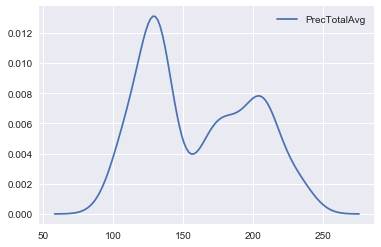

In [42]:
# Moyenne de précipitations sur 10 mois -> on observe 2 pics 
sns.kdeplot(df.PrecTotalAvg)

In [43]:
prec_groupby_year = df['PrecTotalAvg'].groupby(df['year'])

prec_groupby_year.describe()

year       
2011  count    489.000000
      mean     195.073620
      std       26.474522
      min      108.000000
      25%      176.000000
      50%      201.000000
      75%      212.000000
      max      245.000000
2016  count    610.000000
      mean     132.459016
      std       21.935847
      min       89.000000
      25%      119.250000
      50%      130.000000
      75%      136.000000
      max      189.000000
Name: PrecTotalAvg, dtype: float64

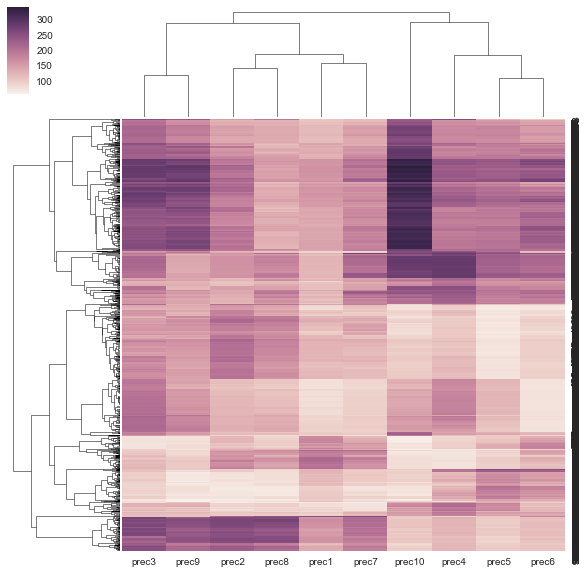

In [52]:
colonnes = ['PrecTotalAvg','Puntaje Total']
sns.clustermap(df[precs])

In [63]:
dftmp = df[['DtrTotalAvg','PrecTotalAvg','TminTotalAvg','TmaxTotalAvg','TmeanTotalAvg','Puntaje Total', 'year']]
dftmp.groupby(['year']).mean()

,DtrTotalAvg,PrecTotalAvg,TminTotalAvg,TmaxTotalAvg,TmeanTotalAvg,Puntaje Total
year,,,,,,
2011,8.523517,195.073620,16.059305,25.110429,18.517382,66.343558
2016,9.165574,132.459016,15.667213,25.390164,18.401639,79.094635
